In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/Musk Non-musk')

In [5]:
!ls

musk_csv.csv  musk_non-musk.ipynb


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [7]:
data = pd.read_csv("musk_csv.csv")

In [8]:
data.head(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [9]:
data.tail(5)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,80,-227,-52,-139,-63,-51,-79,-99,-122,-220,-35,-57,6,-104,-183,-196,-51,63,-204,-169,-154,63,128,-108,135,-121,42,-122,73,-90,...,98,-57,-152,43,-4,-69,-51,-37,-23,-175,-33,-209,-108,-125,-139,-153,-170,-178,-102,-115,-42,-66,-141,-96,-110,-113,-46,124,-11,95,40,124,-14,-30,107,171,-44,-115,118,0


In [10]:
data.info

<bound method DataFrame.info of         ID  molecule_name conformation_name  f1  ...  f164  f165  f166  class
0        1       MUSK-211           211_1+1  46  ...   -50  -112    96      1
1        2       MUSK-211          211_1+10  41  ...   -61  -136    79      1
2        3       MUSK-211          211_1+11  46  ...   -67  -145    39      1
3        4       MUSK-211          211_1+12  41  ...   -60  -135    80      1
4        5       MUSK-211          211_1+13  41  ...   -60  -135    80      1
...    ...            ...               ...  ..  ...   ...   ...   ...    ...
6593  6594  NON-MUSK-jp13          jp13_2+5  51  ...   -44  -115   118      0
6594  6595  NON-MUSK-jp13          jp13_2+6  44  ...   -66  -144    -5      0
6595  6596  NON-MUSK-jp13          jp13_2+7  44  ...   -66  -144    -6      0
6596  6597  NON-MUSK-jp13          jp13_2+8  51  ...   -44  -116   117      0
6597  6598  NON-MUSK-jp13          jp13_2+9  51  ...   -44  -115   118      0

[6598 rows x 170 columns]>

In [11]:
data.shape

(6598, 170)

In [14]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [15]:
data['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-308        2
NON-MUSK-295        2
NON-MUSK-358        2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64

First, perform a multi-class classification of 102 types of moelcules in the dataset

In [16]:
data.isnull().values.any()

False

In [18]:
data.nunique()

ID                   6598
molecule_name         102
conformation_name    6598
f1                    202
f2                    260
                     ... 
f163                  292
f164                  172
f165                  352
f166                  385
class                   2
Length: 170, dtype: int64

In [19]:
X = data.iloc[:,3:-1].values

In [20]:
X.shape

(6598, 166)

In [21]:
Y = data.iloc[:, 1].values

In [22]:
Y.shape

(6598,)

In [26]:
np.unique(Y).shape

(102,)

In [28]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

In [30]:
from sklearn.preprocessing import OneHotEncoder
Y = OneHotEncoder().fit_transform(Y.reshape(-1,1)).toarray()

In [32]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [34]:
import tensorflow as tf

In [35]:
import keras
from keras.layers import Dense

In [37]:
model = keras.Sequential()
model.add(Dense(300, activation= 'softmax'))
model.add(Dense(200, activation= 'relu'))
model.add(Dense(102, activation= 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'mse', metrics= ['accuracy'])

In [39]:
model.fit(X_train, Y_train, verbose=1, validation_data=(X_test, Y_test), epochs=100)
model.save('model_musk.h5')

Epoch 1/100
165/165 [==============================] - 2s 6ms/step - loss: 0.1474 - accuracy: 0.0314 - val_loss: 0.0092 - val_accuracy: 0.1621
Epoch 2/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.1667 - val_loss: 0.0084 - val_accuracy: 0.2674
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.3430 - val_loss: 0.0069 - val_accuracy: 0.4311
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0067 - accuracy: 0.4476 - val_loss: 0.0057 - val_accuracy: 0.5492
Epoch 5/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.5400 - val_loss: 0.0049 - val_accuracy: 0.6523
Epoch 6/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.6346 - val_loss: 0.0042 - val_accuracy: 0.7227
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.7104 - val_loss: 0.0036 - val_accuracy: 0.7409

In [40]:
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

train_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

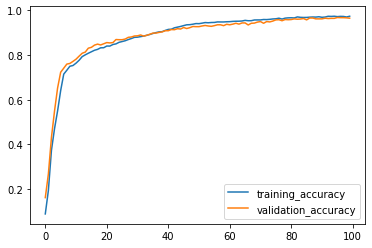

In [41]:
plt.plot(train_accuracy, label = "training_accuracy")
plt.plot(validation_accuracy, label = "validation_accuracy")
plt.legend()
plt.show()

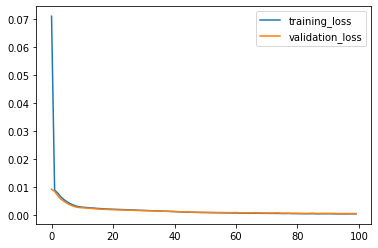

In [42]:
plt.plot(train_loss, label = "training_loss")
plt.plot(validation_loss, label = "validation_loss")
plt.legend()
plt.show()

Testing model metrics

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               50100     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 102)               20502     
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


In [44]:
y_test_model = model.predict(X_test)

In [45]:
y_test_model_i = []
Y_test_i = []
for i in range(len(Y_test)):
  y_test_model_i.append(np.argmax(y_test_model[i]))
  Y_test_i.append(np.argmax(Y_test[i]))
  

In [46]:
y_test_model_i = np.array(y_test_model_i)
Y_test_i = np.array(Y_test_i)

In [47]:
print("Accuracy = ")
sum((y_test_model_i == Y_test_i).astype(int)/len(Y_test_i))


Accuracy = 


0.9643939393939189

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(Y_test_i,y_test_model_i))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         6
           9       0.00      0.00      0.00         1
          10       0.87      1.00      0.93        13
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00        13
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         4
          21       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
con_matrix = confusion_matrix(Y_test_i, y_test_model_i)

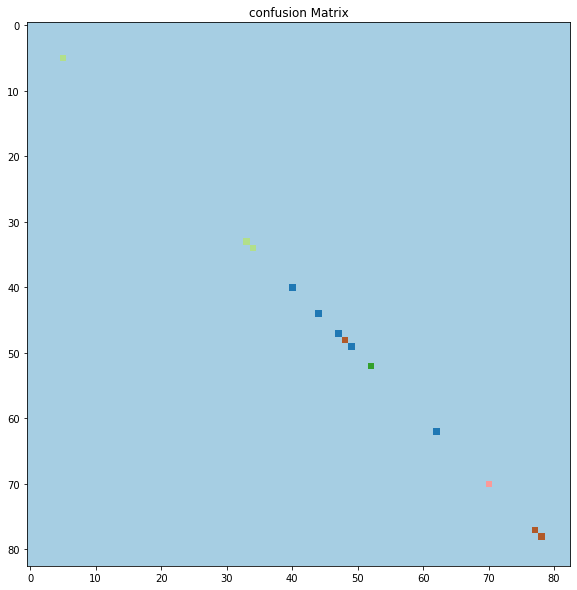

In [52]:
plt.figure(figsize=(10,10))
plt.title("confusion Matrix")
plt.imshow(con_matrix, cmap= 'Paired', interpolation= 'nearest')
plt.show()

Now, using Binary classification to finally classify as Musk or Non-Musk

In [54]:
Y1 = data.iloc[:, -1].values

In [55]:
Y1.shape

(6598,)

In [56]:
tranfer_model = model

In [58]:
tranfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               50100     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 102)               20502     
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


In [59]:

tranfer_model.add(Dense(50, activation='relu'))
tranfer_model.add(Dense(1, activation='sigmoid'))
tranfer_model.compile(optimizer='adam', loss= 'mse', metrics=['accuracy'])

In [60]:
tranfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               50100     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 102)               20502     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5150      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 136,003
Trainable params: 136,003
Non-trainable params: 0
_________________________________________________________________


In [61]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1, train_size = 0.8, test_size = 0.2)

In [62]:
tranfer_model.fit(X_train1, Y_train1, verbose=1, validation_data=(X_test1, Y_test1), epochs=20)


Epoch 1/20
165/165 [==============================] - 1s 4ms/step - loss: 0.1596 - accuracy: 0.8615 - val_loss: 0.0308 - val_accuracy: 0.9583
Epoch 2/20
165/165 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9646 - val_loss: 0.0168 - val_accuracy: 0.9773
Epoch 3/20
165/165 [==============================] - 1s 4ms/step - loss: 0.0124 - accuracy: 0.9840 - val_loss: 0.0072 - val_accuracy: 0.9955
Epoch 4/20
165/165 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9947 - val_loss: 0.0044 - val_accuracy: 0.9970
Epoch 5/20
165/165 [==============================] - 1s 4ms/step - loss: 0.0021 - accuracy: 0.9988 - val_loss: 0.0032 - val_accuracy: 0.9962
Epoch 6/20
165/165 [==============================] - 1s 4ms/step - loss: 0.0016 - accuracy: 0.9987 - val_loss: 0.0026 - val_accuracy: 0.9970
Epoch 7/20
165/165 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9983 - val_loss: 0.0028 - val_accuracy: 0.9970
Epoch 

NameError: ignored

In [63]:
tranfer_model.save("model_muskAfterTransfer.h5")

In [64]:
new_accuracy = tranfer_model.history.history['accuracy']
new_validation = tranfer_model.history.history['val_accuracy']

new_train_loss = tranfer_model.history.history['loss']
new_val_loss = tranfer_model.history.history['val_loss']

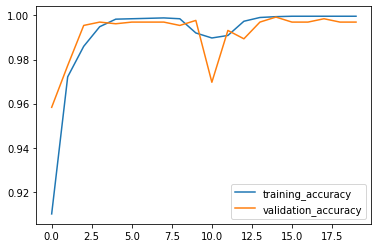

In [65]:
plt.plot(new_accuracy, label = "training_accuracy")
plt.plot(new_validation, label = "validation_accuracy")
plt.legend()
plt.show()

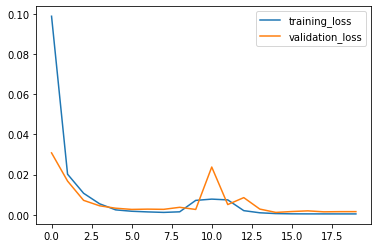

In [66]:
plt.plot(new_train_loss, label = "training_loss")
plt.plot(new_val_loss, label = "validation_loss")
plt.legend()
plt.show()

In [67]:
new_y = tranfer_model.predict(X_test1)

In [68]:
new_y = (new_y[:]>(0.5)).astype(int).flatten()

In [70]:
print(classification_report(Y_test1, new_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1109
           1       1.00      0.98      0.99       211

    accuracy                           1.00      1320
   macro avg       1.00      0.99      0.99      1320
weighted avg       1.00      1.00      1.00      1320



In [71]:
print("Accuracy = ")
sum(Y_test1 == new_y).astype(int)/len(new_y)

Accuracy = 


0.996969696969697

In [72]:
confusion_matrix(Y_test1, new_y)

array([[1109,    0],
       [   4,  207]])